In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import urllib.request

urllib.request.urlretrieve('https://raw.githubusercontent.com/creotiv/Python-Shape-Context/master/A.png', 'test.png')
urllib.request.urlretrieve('https://raw.githubusercontent.com/creotiv/Python-Shape-Context/master/A2.png', 'test2.png')
urllib.request.urlretrieve('https://raw.githubusercontent.com/creotiv/Python-Shape-Context/master/AM.png', 'test3.png')
urllib.request.urlretrieve('https://raw.githubusercontent.com/creotiv/Python-Shape-Context/master/AM2.png', 'test4.png')
urllib.request.urlretrieve('https://raw.githubusercontent.com/creotiv/Python-Shape-Context/master/AM3.png', 'test5.png')
urllib.request.urlretrieve('https://raw.githubusercontent.com/creotiv/Python-Shape-Context/master/B.png', 'test6.png')
urllib.request.urlretrieve('https://raw.githubusercontent.com/creotiv/Python-Shape-Context/master/9.png', 'test7.png')
urllib.request.urlretrieve('https://raw.githubusercontent.com/creotiv/computer_vision/master/resources/sc/numbers.png', 'numbers.png')
urllib.request.urlretrieve('https://raw.githubusercontent.com/creotiv/computer_vision/master/resources/sc/numbers_test1.png', 'numbers_test1.png')
urllib.request.urlretrieve('https://raw.githubusercontent.com/creotiv/computer_vision/master/resources/sc/numbers_test2.png', 'numbers_test3.png')
urllib.request.urlretrieve('https://raw.githubusercontent.com/creotiv/computer_vision/master/resources/sc/numbers_test3.png', 'numbers_test3.png')

In [2]:
import numpy as np
import cv2
import math
from scipy.spatial.distance import cdist, cosine
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import sys

sys.path.append(r"C:\Users\hwenjun\Documents\GitHub\computer_vision")
from shape_context.shape_context import ShapeContext
ShapeContext.tests()


Tests PASSED


In [13]:
def plot(img, img2, rotate=False):
    sc = ShapeContext()
    sampls = 100

    points1 = sc.get_points_from_img(img,simpleto=sampls)
    points2 = sc.get_points_from_img(img2,simpleto=sampls)
    points2 = (np.array(points2)+30).tolist()

    if rotate:
        # https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html
        theta = np.radians(90)
        c, s = np.cos(theta), np.sin(theta)
        R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
        points2 = np.dot(np.array(points2), R).tolist()

    P = sc.compute(points1)
    print(P[0])
    x1 = [p[1] for p in points1]
    y1 = [p[0] for p in points1]
    Q = sc.compute(points2)
    x2 = [p[1] for p in points2]
    y2 = [p[0] for p in points2]

    standard_cost,indexes = sc.diff(P,Q)
    
    lines = []
    for p,q in indexes:
        lines.append(((points1[p][1],points1[p][0]), (points2[q][1],points2[q][0])))
    
    ax = plt.subplot(121)
    plt.gca().invert_yaxis()
    plt.plot(x1,y1,'go', x2,y2, 'ro')
    
    ax = plt.subplot(122)
    plt.gca().invert_yaxis()
    plt.plot(x1,y1,'go',x2,y2,'ro')
    for p1,p2 in lines:   
        plt.gca().invert_yaxis()
        plt.plot((p1[0],p2[0]),(p1[1],p2[1]), 'k-')
    plt.show()
    print("Cosine diff:", cosine(P.flatten(), Q.flatten()))
    print("Standard diff:", standard_cost)

  

Not let's see this algorithm in action with trying to match few characters.

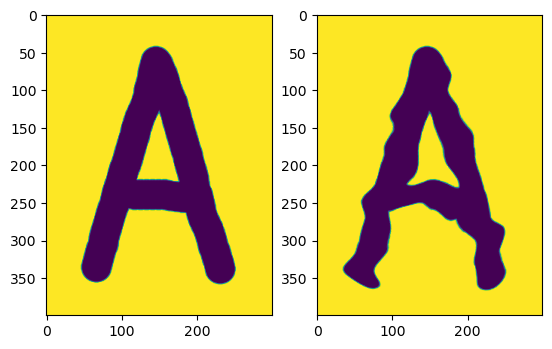

[ 0.  0.  0.  7. 10. 11.  3.  0.  0.  0.  0.  0.  4.  4.  3.  6.  4.  6.
  5.  3.  4.  1.  2.  4.  0.  0.  1.  1.  3.  3.  2.  0.  0.  1.  2.  1.
  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.]


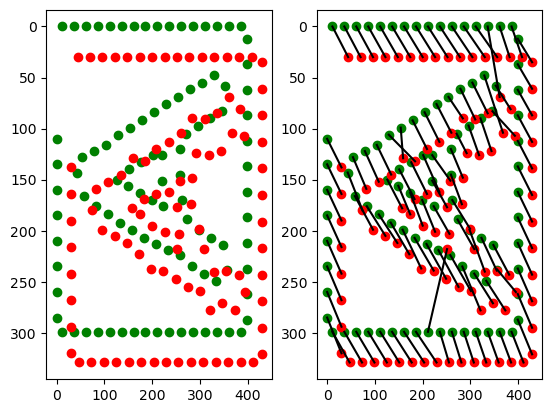

Cosine diff: 0.04896033578470671
Standard diff: 3.5864213619644705
[ 0.  0.  0.  7. 10. 11.  3.  0.  0.  0.  0.  0.  4.  4.  3.  6.  4.  6.
  5.  3.  4.  1.  2.  4.  0.  0.  1.  1.  3.  3.  2.  0.  0.  1.  2.  1.
  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.]


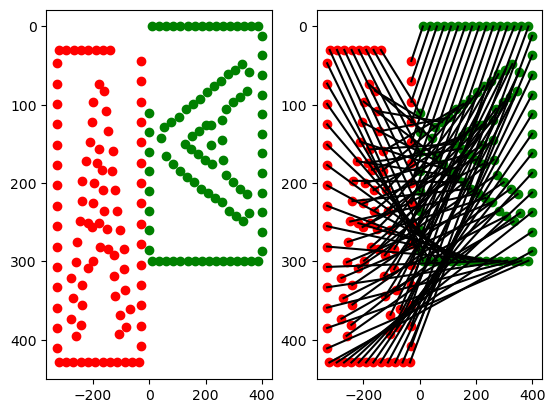

Cosine diff: 0.04896033578470671
Standard diff: 3.5864213619644705


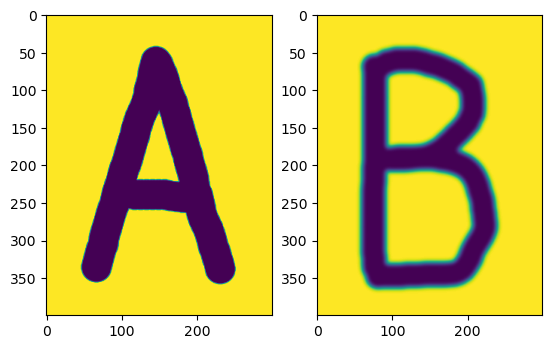

[ 0.  0.  0.  7. 10. 11.  3.  0.  0.  0.  0.  0.  4.  4.  3.  6.  4.  6.
  5.  3.  4.  1.  2.  4.  0.  0.  1.  1.  3.  3.  2.  0.  0.  1.  2.  1.
  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.]


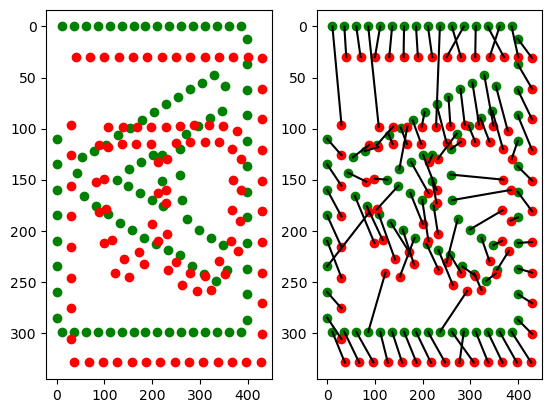

Cosine diff: 0.341245815327482
Standard diff: 11.43315704136039


In [14]:
img = cv2.imread('test.png', 0)
img2 = cv2.imread('test3.png', 0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2)
plt.show()
plot(img, img2)

img = cv2.imread('test.png', 0)
img2 = cv2.imread('test3.png', 0)
# with 90 degree rotation
plot(img, img2, rotate=True)

img = cv2.imread('test.png', 0)
img2 = cv2.imread('test6.png', 0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2)
plt.show()
plot(img, img2)


As you can see modification cost for shifted and rotated & shifted pathes are the same, so algorithm is trully scale & rotation invariant.

So now let's try to do something more interesting - character recognition task.

In [25]:
from shape_context.number_recognition import parse_nums

sc = ShapeContext()


In [29]:
base_0123456789 = parse_nums(sc, 'numbers.png')
recognize = parse_nums(sc, 'numbers_test3.png')
res = ""
for r in recognize:
    res += match(base_0123456789, r)

img = cv2.imread('numbers_test3.png')
plt.imshow(img)
plt.show()    
print(res)

ValueError: slice step cannot be zero

**What could go wrong?**

1. One of the biggest problems of all descriptors is to choosing right key-points from image. Here we used not the best algorithm of choosing them, and in a more complex example it would fail.

2. Another thing to consider is a characters vocabluary. Here for font characters we dont need it, but if you will want to make hand written symbol recognition then you will need it, cause same symbol can be written with big difference, and only one base exmaple will fail your recognition task.

**Papers to read**


1. Main doc about shape context https://github.com/creotiv/Python-Shape-Context/blob/master/info/10.1.1.112.2716.pdf
2. Good slides for understanding mechanics of algorithm https://github.com/creotiv/Python-Shape-Context/blob/master/info/ShapeContexts425.pdf

